<a href="https://colab.research.google.com/github/seyoung0218/Aiffel-Exploration/blob/main/Exploration2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트1 - 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
## Step1. 데이터 불러오기
먼저 데이터를 불러오겠습니다.

In [ ]:
from sklearn.datasets import load_diabetes
Data = load_diabetes()
Data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

## Step2. 데이터 이해하기
data와 target의 형태를 확인해보겠습니다.

In [ ]:
print(Data.data.shape)
print(Data.target.shape)

(442, 10)
(442,)


데이터는 총 442개가있고 특성은 10개로 구성되어있습니디. 한번 data와 target일부를 출력해봄으로써, 자세히 살펴보겠습니다.

In [ ]:
print(Data.data[:3])
print(Data.target[:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


숫자만봐서는 이 숫자들이 어떤것을 의미하는지 알기 어렵습니다. feature_names를 출력해보겠습니다.

In [ ]:
Data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

각 특성의 이름을봐도 감이 잡히질않습니다. 앞 3개의 컬럼은 직관적으로 알수있지만 나머지 값들은 알수가없습니다. DESCR을 출력해 확인해보겠습니다.

In [ ]:
print(Data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Data의 DESCR을 출력해보니, 각 특성별로 설명이 전부 적혀있습니다. 그리고 각 특성별로 데이터들이 전처리가 되어있다고 적혀있습니다. 따라서 여기서 풀어야할 문제는 각 신체정보주어지면, 해당 사람의 당뇨병 수치를 예측하는것입니다.
 
이제 data를 df_X에, target을 df_y에 저장해보겠습니다. 

In [ ]:
df_X = Data.data
df_y = Data.target
print("df_X의 데이터타입 : ",type(df_X))
print("df_y의 데이터타입 : ",type(df_y))

df_X의 데이터타입 :  <class 'numpy.ndarray'>
df_y의 데이터타입 :  <class 'numpy.ndarray'>


둘다 넘파이 배열인것을 확인할 수 있습니다.
## Step3. trainsets 과 testsets으로 분리하기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

분리된 훈련셋과 테스트셋이 잘 나뉘었는지 확인해봅시다.

In [ ]:
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)

X_train : (353, 10)
X_test : (89, 10)


4:1 비율로 잘 나뉘어있는것 같습니다.

## Step4. 파라미터와 모델함수 구현
이번문제를 풀기위해서 사용할 방식은 선형회귀입니다. 따라서 다음과 같은 선형방정식을 구해내야합니다.
 
    y = w0x0 w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 + w7x7 + w8x8 + w9x9 + b 

먼저 데이터의 컬럼이 총10개이기때문에 10개의 w와 한개의 b가 필요합니다.

In [ ]:
import numpy as np
W = np.random.rand(10)
b = np.random.rand()
print(W)
print(b)

[0.68395443 0.39120599 0.20405227 0.72803481 0.20528923 0.06660009
 0.27650489 0.65496538 0.61292102 0.14259964]
0.7275105584980627


위와 같이 10개의 w와 한개의 b가 준비되었습니다. 이제 모델 함수를 구현해보겠습니다. 

In [ ]:
def model(X, W, b):
    predictions = 0

    for i in range(10):
        predictions += X[:, i] * W[i]  
  
    predictions += b
  
    return predictions

위와같은 선형방정식을 표현하는 모델함수를 작성해보았습니다. 이제 mse함수로 정의한 손실함수를 구현해보겠습니다.

## Step5. 손실함수와 기울기함수 정의

In [ ]:
# MSE정의 : 두 값의 차이의 제곱의 평균
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  
    return mse

In [ ]:
# 손실함수 
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L2 = MSE(predictions, y)
    return L2

이제 기울기를 구하는 함수 gradient를 구현하겠습니다.

In [ ]:
def gradient(X, W, b, y):
    N = len(W)    # w의 총개수

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)    # w의 기울기
    db = 2 * (y_pred - y).mean()    # b의 기울기
    
    return dW, db

학습률인 learning rate도 설정해 봅시다.

In [ ]:
learning_rate = 0.0001

## Step6. 모델 학습하기

In [ ]:
losses_list = []

for i in range(0,20001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L2 = loss(X_train, W, b, y_train)
    losses_list.append(L2)

손실함수값이 얼마나 떨어졌는지 시각화해보겠습니다.

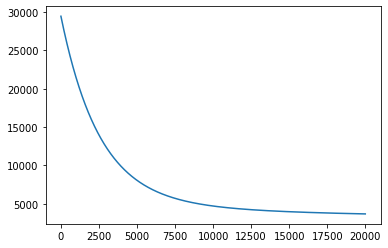

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses_list)
plt.show()

그래프를 확인해 보면 손실함수가 10000번은 기점으로 감소하는 폭이 많이 줄었습니다. 마지막 손실함수값을 확인해보겠습니다.

In [ ]:
print(L2)

3676.8725553562945


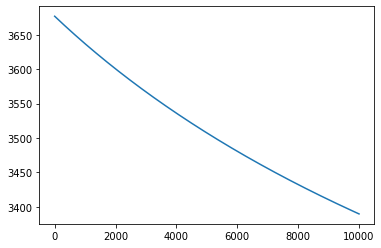

In [ ]:
losses_list2 = []

for i in range(0,10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L2 = loss(X_train, W, b, y_train)
    losses_list2.append(L2)

import matplotlib.pyplot as plt
plt.plot(losses_list2)
plt.show()

10000번을 더 진행했음에도 별로 진전이 없는것 같습니다. 이번에는 learning_rate를 0.1로 바꿔서 해보겠습니다.

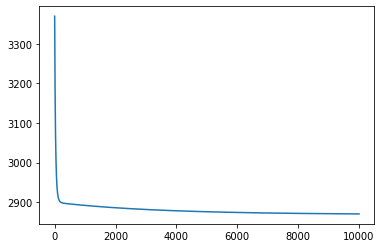

In [ ]:
learning_rate = 0.1

losses_list3 = []

for i in range(0,10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L2 = loss(X_train, W, b, y_train)
    losses_list3.append(L2)

import matplotlib.pyplot as plt
plt.plot(losses_list3)
plt.show()

In [ ]:
print(L2)

2870.1642190555317


2869에서 거의 바뀌지 않습니다. 이제 손실함수는 충분히 떨어진것같습니다. 이제 최종 w와 b를 확인해보고,test데이터에 대한 성능을 확인해 보겠습니다. 
## Step7. test데이터에 대한 성능확인

In [ ]:
print("W :", W)
print("b :", b)

W : [  39.0117552  -241.55611095  546.25846777  346.50226205 -733.98309714
  363.11091751   74.8276669   248.09591593  660.50157075   50.08045937]
b : 151.3355806860203


In [ ]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2893.4764023236007

## Step8. 정답데이터와 예측한 데이터 시각화하기

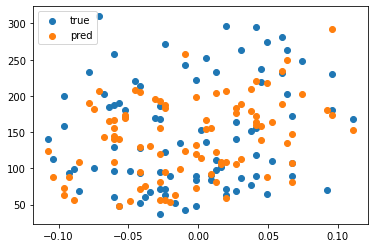

In [ ]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()

모델이 예측한 데이터와 실제데이터와 겹치는부분이 많이 보이는걸로보아, 잘 맞힌것 같습니다.

# 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?


## Step1. 데이터 가져오기

In [ ]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

train = pd.read_csv('/content/drive/MyDrive/캐글 데이터/자전거 수요예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/캐글 데이터/자전거 수요예측/test.csv')

## Step2. 데이터 이해하기

In [ ]:
print(train.shape)
print(test.shape)

(10886, 12)
(6493, 9)


In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


여기서 풀어야할 문제는 날짜와 날씨데이터등이 주어지면 자전거를 타는사람이 몇명인지 예측해내는 것입니다.

## Step3. 연, 월, 일, 시, 분, 초 컬럼생성

In [ ]:
train['year'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[2])

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04,00,00


## Step4. 데이터개수 시각화하기

Text(0.5, 1.0, 'Rental amounts by second')

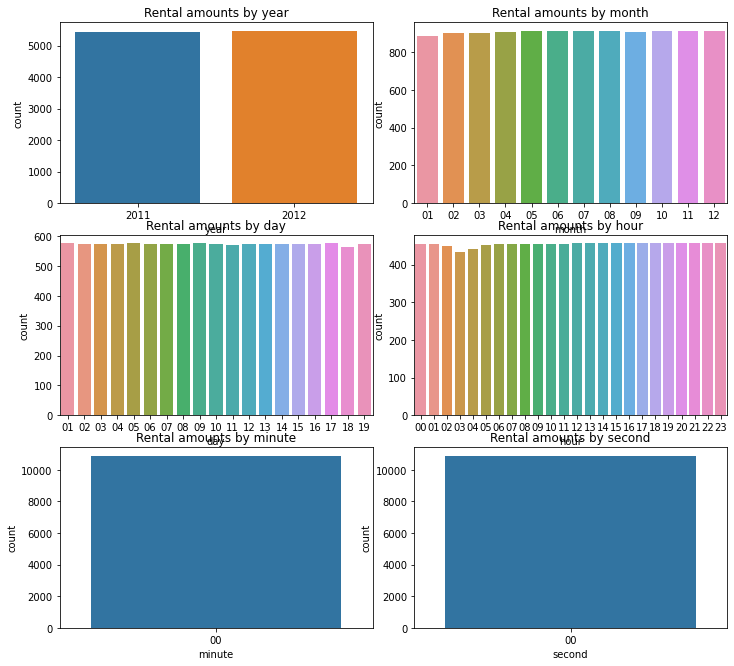

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(10,9)
plt.tight_layout()

sns.countplot('year', data=train, ax=ax[0,0])
sns.countplot('month', data=train, ax=ax[0,1])
sns.countplot('day', data=train, ax=ax[1,0])
sns.countplot('hour', data=train, ax=ax[1,1])
sns.countplot('minute', data=train, ax=ax[2,0])
sns.countplot('second', data=train, ax=ax[2,1])

ax[0,0].set_title('Rental amounts by year')
ax[0, 1].set_title('Rental amounts by month')
ax[1, 0].set_title('Rental amounts by day')
ax[1, 1].set_title('Rental amounts by hour')
ax[2, 0].set_title('Rental amounts by minute')
ax[2, 1].set_title('Rental amounts by second')

## Step5. X,y컬럼 선택 및 훈련,테스트 데이터 분리

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,01,04,00,00


여기서 datetime, casual, registered, count 컬럼은 훈련하는데 필요없어보입니다.

In [ ]:
from sklearn.model_selection import train_test_split
y = train['count'] # 레이블 설정
train = train.drop(['datetime', 'casual', 'registered', 'count'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape

((8708, 14), (8708,))

## Step6. 모델 학습 및 성능평가

In [ ]:
# 모델학습시키기
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, np.log(y_train))

LinearRegression()

In [ ]:
# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
pred = LR.predict(X_test)

이제 모델 성능을 측정해보겠습니다. 손실함수로는 RMSLE를 사용하고, 구현해보겠습니다.


In [ ]:
def rmsle(y_true, y_pred, convertExp=True):
    
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    
    return output

In [ ]:
print(f'선형회귀의 RMSLE 값 : {rmsle(np.log(y_test), pred, True):.4f}')

선형회귀의 RMSLE 값 : 1.0275


이번엔 손실함수로 mse와 rmse를 사용해 보겠습니다. 코드는 다음과 같습니다. 

In [ ]:
def RMSE(a, b):
	mse = ((a - b) ** 2).mean()  
	rmse = mse ** 0.5      
	return rmse

In [119]:
RMSE(y_test, pred)

260.28470350011423

## Step7. temp와 humidity 시각화

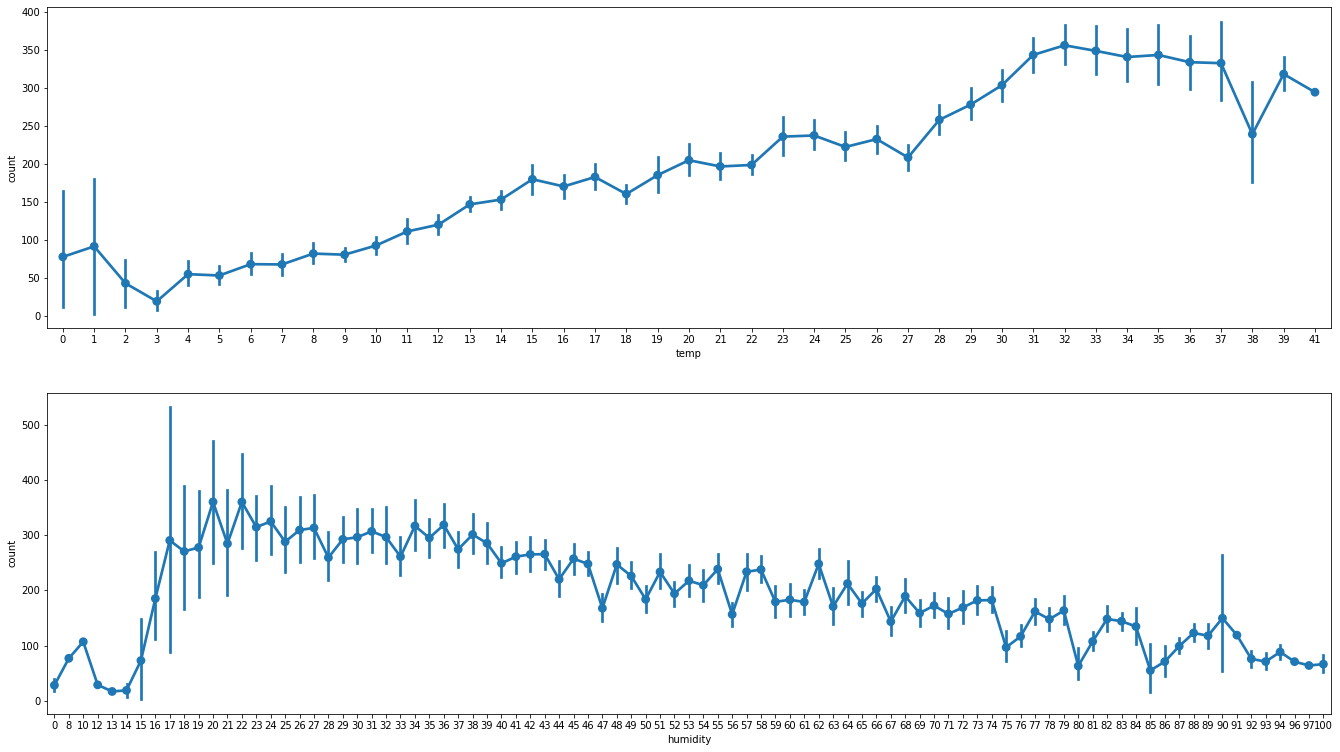

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/캐글 데이터/자전거 수요예측/train.csv')

# temp와 humidity 데이터 전부 정수화시켜주기
train['temp'] = train['temp'].apply(lambda x:int(x))
train['humidity'] = train['humidity'].apply(lambda x:int(x))

# 그래프 그리기
fig, ax = plt.subplots(2, 1)
fig.set_size_inches(23,13)
sns.pointplot('temp','count', data=train, ax=ax[0])
sns.pointplot('humidity','count', data=train, ax=ax[1])



# 회고
프로젝트1 : 이제 데이터를 이해하고 훈련셋과 테스트셋으로 분류하는것은 어느정도 익숙해진것 같다. 이번에는 사이킷런에서 모델을 불러와 사용하지않고, 직접 모델함수를 구현하였다. 사용한 방식은 선형회귀이며, 선형방정식을 사용해 예측값을 뽑아냈고, 하이퍼파라미터인 학습률을 조절해가면서, 훈련을 반복해 손실함수 값을 줄여나갔다. 이러한 과정을 진행하면서 사이킷런에서 모델을 불러와 사용할때, 모델이 어떤 프로세스를 가지고 훈련하고 예측하는지 좀더 자세히 이해할 수 있는 시간이었다.

프로젝트2 : 날짜데이터를 원하는 형태(연도,월,일 등)로 바꾸는데 어느정도 익숙해졌다. 여기서는 프로젝트1과 똑같이 선형회귀를 사용했지만, 다른점은 여기서는 사이킷런으로 모델을 임포트해서 사용하였다는 점이다. 그리고 손실함수로는 rmsle과 rmse를 사용했다. 여러가지 손실함수를 사용해보고 공부해보면서 손실함수에대한 이해도를 높일수 있었다.